# Lambda School Data Science Module 123

## Introduction to Bayesian Inference




## Assignment - Code it up!

We used pure math to apply Bayes Theorem to drug tests. Now write Python code to reproduce the results! This is purposefully open ended - you'll have to think about how you should represent probabilities and events. You can and should look things up.

Specific goals/targets:

### 1) Write a function 

`def prob_drunk_given_positive(prob_drunk_prior, false_positive_rate, true_positive_rate):` 

You should only truly need these three values in order to apply Bayes Theorem. In this example, imagine that individuals are taking a breathalyzer test with an 8% false positive rate, a 100% true positive rate, and that our prior belief about drunk driving in the population is 1/1000. 
 - What is the probability that a person is drunk after one positive breathalyzer test?
 - What is the probability that a person is drunk after two positive breathalyzer tests?
 - How many positive breathalyzer tests are needed in order to have a probability that's greater than 95% that a person is drunk beyond the legal limit?





In [0]:
# Define the function
def prob_drunk_given_positive(prob_drunk_prior, false_positive_rate, true_positive_rate):
  prior_compliment = 1 - prob_drunk_prior
  return (true_positive_rate * prob_drunk_prior) / ((true_positive_rate * prob_drunk_prior) + (false_positive_rate * prior_compliment))

In [4]:
# Example probability with 8% false positive rate, a 100% true positive rate, 
# and prior belief 1/1000
example_prob = prob_drunk_given_positive(1/1000, .08, 1)

print("probability that a person is drunk after one positive test:", example_prob)

probability that a person is drunk after one positive test: 0.012357884330202669


In [5]:
prob1 = prob_drunk_given_positive(1/1000, .08, 1)
example_prob = prob_drunk_given_positive(prob1, .08, 1)

print("probability that a person is drunk after two positive tests:", example_prob)

probability that a person is drunk after two positive tests: 0.13525210993291495


In [6]:
prob_drunk = prob_drunk_given_positive(1/1000, .08, 1)
tests_run = 1

while prob_drunk < .95:
  prob_drunk = prob_drunk_given_positive(prob_drunk, .08, 1)
  tests_run += 1

print("It took", tests_run, "tests to pass 95% probability")
print("Probability after", tests_run, "tests:", prob_drunk)

It took 4 tests to pass 95% probability
Probability after 4 tests: 0.9606895076105054


### 2) Explore `scipy.stats.bayes_mvs`  
Read its documentation, and experiment with it on data you've tested in other ways earlier this week.
 - Create a visualization comparing the results of a Bayesian approach to a traditional/frequentist approach. (with a large sample size they should look close to identical, however, take this opportunity to practice visualizing condfidence intervals in general. The following are some potential ways that you could visualize confidence intervals on your graph:
  - [Matplotlib Error Bars](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.errorbar.html)
  - [Seaborn barplot with error bars](https://seaborn.pydata.org/generated/seaborn.barplot.html)
  - [Vertical ines to show bounds of confidence interval](https://www.simplypsychology.org/confidence-interval.jpg)
  - [Confidence Intervals on Box Plots](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.axes.Axes.boxplot.html)

In [0]:
import random
from scipy import stats
import numpy as np

# I decided to generate some new data
def roll_dice(num_dice, sides=6):
  """
  Rolls num_dice and adds the results together

  sides: the number of sides on each die
  """
  total = 0
  for i in range(num_dice):
    total += random.randint(1, sides)
  
  return total

def get_dice_totals(num_rolls, sides=6):
  """
  Returns an array of dice roll totals
  """
  dice_results = []
  for i in range(num_rolls):
    dice_results.append(roll_dice(2, sides))
  
  return dice_results

In [0]:
# Frequentist confidence interval function I wrote for yesterday's assignment
def freq_conf_int(data, confidence=.95):
  a = np.array(data)
  high, low = stats.t.interval(confidence, len(a)-1, loc=np.mean(a), scale=stats.sem(a))
  
  return np.mean(a), high, low

In [65]:
# roll a bunch of dice
dice_results = get_dice_totals(100)
np.array(dice_results)-

array([ 8,  5,  7,  5,  5,  9,  6,  9,  4, 12,  7,  5,  9,  7,  2,  8, 10,
        6,  4,  7,  9,  6, 10,  7,  5, 11,  9,  7,  7,  7,  4, 12,  5,  3,
        8,  4, 10, 10,  4,  5,  8,  7,  6, 12,  6,  9, 12,  6,  8, 10, 11,
       10,  9,  3,  8,  8,  9,  6, 12,  9,  6, 10,  9,  9,  8,  2, 12,  4,
        6,  3,  7,  5,  6,  2,  8,  7,  6, 11,  6,  7,  8,  8,  6,  9,  4,
        5,  5,  5,  5,  7,  4,  5,  9,  9, 10,  8,  9, 10,  8,  7])

In [66]:
# Calculate a Bayesian confidence interval
bayesian_confidence, _, _ = stats.bayes_mvs(dice_results, alpha=.95)
bayesian_confidence

Mean(statistic=7.22, minmax=(6.728613597755903, 7.711386402244097))

In [67]:
# Check against the Frequentist confidence interval
freq_conf_int(dice_results)

(7.22, 6.728613597755903, 7.711386402244097)

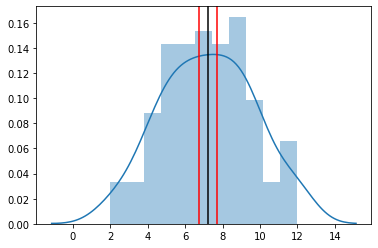

In [68]:
# Display with seaborn's distplot
import seaborn as sns
import matplotlib.pyplot as plt

bayesian_confidence, _, _ = stats.bayes_mvs(dice_results, alpha=.95)
sns.distplot(dice_results, bins=11)
plt.axvline(x=bayesian_confidence[1][0], color='red') #lower bound
plt.axvline(x=bayesian_confidence[1][1], color='red') #upper bound
plt.axvline(x=bayesian_confidence[0], color='black');  #mean

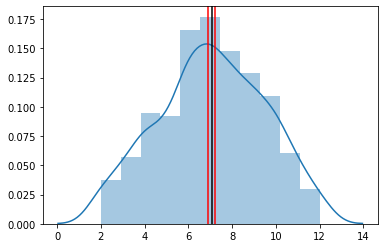

In [108]:
# Same thing again, but with a higher sample size
more_dice = get_dice_totals(1000)

bayesian_confidence, _, _ = stats.bayes_mvs(more_dice, alpha=.95)
sns.distplot(more_dice, bins=11)
plt.axvline(x=bayesian_confidence[1][0], color='red') #lower bound
plt.axvline(x=bayesian_confidence[1][1], color='red') #upper bound
plt.axvline(x=bayesian_confidence[0], color='black');  #mean

In [109]:
_--

Std_dev(statistic=2.449852790399746, minmax=(2.345226708220997, 2.560292016706688))

In [0]:
# Demonstrate how intervals decrease as sample size increases, 
# using pyplot error bars
def plot_conf_int(data):
  bay_conf, _, _ = stats.bayes_mvs(data, alpha=.95)
  # y = mean
  # yerr = (mean - lower confidence interval)
  ax.errorbar(x=len(data), y=bay_conf[0], yerr=(bay_conf[0]-bay_conf[1][0]), fmt='o')

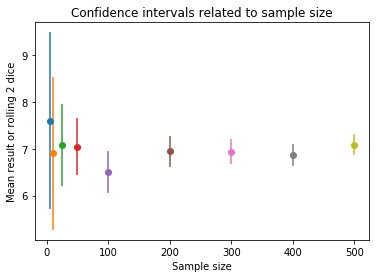

In [106]:
dice = []
dice.append(get_dice_totals(5))
dice.append(get_dice_totals(10))
dice.append(get_dice_totals(25))
dice.append(get_dice_totals(50))
dice.append(get_dice_totals(100))
dice.append(get_dice_totals(200))
dice.append(get_dice_totals(300))
dice.append(get_dice_totals(400))
dice.append(get_dice_totals(500))

fig, ax = plt.subplots()
ax.set_title("Confidence intervals related to sample size")
ax.set_ylabel("Mean result or rolling 2 dice")
ax.set_xlabel("Sample size")

for dice_set in dice:
  plot_conf_int(dice_set)

### 3) In your own words, summarize the difference between Bayesian and Frequentist statistics

If you're unsure where to start, check out [this blog post of Bayes theorem with Python](https://dataconomy.com/2015/02/introduction-to-bayes-theorem-with-python/).

With Frequentist statistics, we use a sample set of data to make inferences on a population parameter.

With Bayesian statistics, we include a prior probability in our calculations which allows us to draw more specific conclusions.

## Resources

- [Worked example of Bayes rule calculation](https://en.wikipedia.org/wiki/Bayes'_theorem#Examples) (helpful as it fully breaks out the denominator)
- [Source code for mvsdist in scipy](https://github.com/scipy/scipy/blob/90534919e139d2a81c24bf08341734ff41a3db12/scipy/stats/morestats.py#L139)

## Stretch Goals:

- Go back and study the content from Modules 1 & 2 to make sure that you're really comfortable with them.
- Apply a Bayesian technique to a problem you previously worked (in an assignment or project work) on from a frequentist (standard) perspective
- Check out [PyMC3](https://docs.pymc.io/) (note this goes beyond hypothesis tests into modeling) - read the guides and work through some examples
- Take PyMC3 further - see if you can build something with it!